# Crypto Modeling based Marginal Cost of Production 

## 1. Introduction

#### According to Hays, the (marginal) cost of production per day, Eday per unit of mining power can be expressed as follows:

$$E_{day} = (\rho / 1000) ($ / kWh \cdot W_{per}GH/s \cdot hr_{day})$$

- $\rho$ is the hashpower (computational power) employed by a miner.
- $/kWh is the dollar price per kilowatt hour.
- W per GH/s is the energy efficiency of the hardware.
- hrsday is the number of hours in a day.

#### The following is to calclulate the daily product as miner:

$$BTC/day* = \left(\frac{ \beta \rho \cdot sec_{hr} }{ \delta \cdot 2^{32} }\right) hr_{day}$$

- BTC/day* is the expected level of daily Bitcoin production when mining Bitcoin.
- β is the block reward (expressed in units of BTC/block),
- ρ is the hashing power employed by a miner.
- δ is the difficulty (expressed in units of GH/block).
- sechr is the number of seconds in an hour.
- hrday is the number of hours in a day.

#### According to the marginal cost thoery, the ratio of (cost/day) divided by (BTC/day) decides P* as a logical lower bound for the market price where miner would operate at the marginal loss and leave the market.

$$P* = (\frac{E_{day}}{BTC/day*})$$

## 2. BTC Modeling

#### Based on Hays' model, we will apply it to BTC valuation modeling.

- Bitcoin Energy Consumption Index
  https://digiconomist.net/bitcoin-energy-consumption
- Bitcoin hashrate
  https://www.blockchain.com/explorer?currency=BTC&stat=hashrate
- Bitcoin difficulty
  https://www.blockchain.com/explorer?currency=BTC&stat=difficulty

### 2.1 Importing Necessary Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np
# from scipy.interpolate import  interp1d

In [14]:
import os
# os.getcwd()

In [15]:
bc = pd.read_csv('/Users/lemontreeran/VENVPythonProj/cyptomodeling/BTC-DATAMODEL.csv')
bc.tail()

,Date,Hashpower,Estimated TWh per Year,Energy efficiency,Estimated TWh per Year min,Energy efficiency min,Difficulty,Market Price
322,2019-10-05,1.002185e+08,73.121461,0.083290,47.370654,0.053958,12759819404408,8137.146689
323,2019-10-08,1.027556e+08,73.121461,0.081233,46.922462,0.052128,12759819404408,8201.637818
324,2019-10-11,1.008752e+08,73.121461,0.082748,50.708252,0.057384,13008091666971,8320.171581
325,2019-10-14,8.729583e+07,73.121461,0.095620,52.101473,0.068132,13008091666971,8337.818999
326,2019-10-17,9.699536e+07,73.121461,0.086058,50.856345,0.059854,13008091666971,8058.058081


### 2.2 Converting Dates into a Datetime Format

In [16]:
bc['Date'] = pd.to_datetime(bc.Date)
bc.dtypes

Date                          datetime64[ns]
Hashpower                            float64
Estimated TWh per Year               float64
Energy efficiency                    float64
Estimated TWh per Year min           float64
Energy efficiency min                float64
Difficulty                             int64
Market Price                         float64
dtype: object

### 2.3 Setup the constant variable: 
##### A. hrs_day(number of hours in a day)
##### B. electricity_cost(13.5 cents per kWh)
##### C. sec_hr(number of seconds in an hour)
##### D. block_reward(12.5 since the data range after 11/02/2017)

In [17]:
hrs_day = 24
sec_hr = 3600
electricity_cost = 0.135
block_reward = 12.5

### 2.4 Calculate model price

In [18]:
bc['model price'] = bc.apply(lambda x: ((x['Hashpower'] / 1000) * (electricity_cost * x['Energy efficiency'] * hrs_day)) / (((block_reward * x['Hashpower'] * sec_hr) / (x['Difficulty'] / 10**9 * 2**32)) * hrs_day), axis=1)
# bc['model price'] = bc.apply(lambda x: ((x['Hashpower'] / 1000) * (electricity_cost * x['Energy efficiency min'] * hrs_day)) / (((block_reward * x['Hashpower'] * sec_hr) / (x['Difficulty'] / 10**9 * 2**32)) * hrs_day), axis=1)

In [19]:
bc.head()

,Date,Hashpower,Estimated TWh per Year,Energy efficiency,Estimated TWh per Year min,Energy efficiency min,Difficulty,Market Price,model price
0,2017-02-11,2917083.567,9.547335,0.373619,0.373619,0.129775,422170566883,997.22750,2032.348910
1,2017-02-14,3546669.948,9.544807,0.307215,3.150062,0.101390,422170566883,994.58000,1671.134293
2,2017-02-17,3168918.119,9.323759,0.335874,3.238448,0.116660,422170566883,1038.86625,1827.026977
3,2017-02-20,3242870.593,9.290790,0.327054,3.270461,0.115126,440779902286,1046.66249,1857.470083
4,2017-02-23,3286693.168,9.507110,0.330206,3.119119,0.108335,440779902286,1122.51500,1875.375210


### 2.5 Setting dates as the index

In [20]:
bc.set_index('Date', inplace=True)
bc.index
bc['Market Price']

Date
2017-02-11     997.227500
2017-02-14     994.580000
2017-02-17    1038.866250
2017-02-20    1046.662490
2017-02-23    1122.515000
                 ...     
2019-10-05    8137.146689
2019-10-08    8201.637818
2019-10-11    8320.171581
2019-10-14    8337.818999
2019-10-17    8058.058081
Name: Market Price, Length: 327, dtype: float64

In [21]:
bc = bc[['Market Price','model price']]

In [22]:
bc.head()
bc.tail()

,Market Price,model price
Date,,
2019-10-05,8137.146689,13693.632467
2019-10-08,8201.637818,13355.518081
2019-10-11,8320.171581,13869.191844
2019-10-14,8337.818999,16026.621712
2019-10-17,8058.058081,14423.959524


### 2.6 Plotting Bitcoin Model Prices

In [23]:
bc_reindexed = bc.reindex(pd.date_range(start=bc.index.min(),end=bc.index.max(),freq='1D'))  
bc_reindexed.interpolate(method='cubic')

,Market Price,model price
2017-02-11,997.227500,2032.348910
2017-02-12,981.568246,1798.621180
2017-02-13,982.598124,1689.389606
2017-02-14,994.580000,1671.134293
2017-02-15,1011.776737,1710.335347
...,...,...
2019-10-13,8354.003082,15378.415504
2019-10-14,8337.818999,16026.621712
2019-10-15,8288.589545,16257.039913
2019-10-16,8198.080610,15809.531915


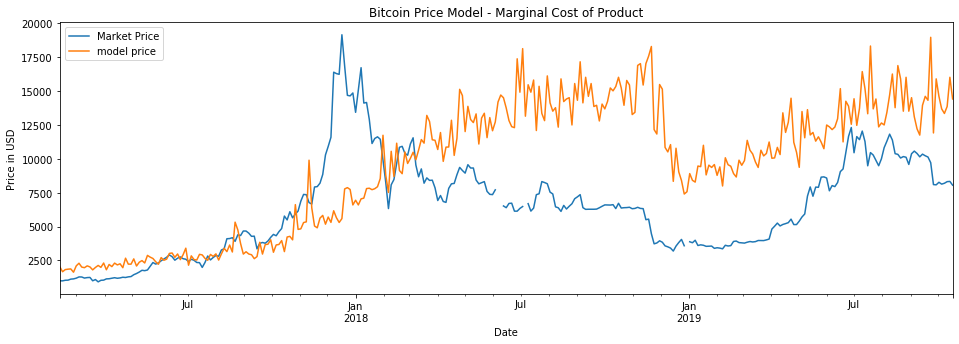

In [24]:
bc.plot(figsize=(16,5))

plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price Model - Marginal Cost of Product')
plt.savefig('btcmodelprice.png')
plt.show()
